In [82]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [83]:
from sklearn.datasets import load_diabetes 
data = load_diabetes()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target
print(df.head())
print(df.shape)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
(442, 11)


In [84]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=42)

In [85]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

lr.fit(X_train , y_train)


LinearRegression()

In [86]:
y_pred = lr.predict(X_test)

In [87]:
from sklearn.metrics import r2_score , mean_squared_error 
print("R2 score" , r2_score(y_test , y_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test , y_pred)))

R2 score 0.4526027629719197
RMSE 53.853445836765914


NOW DOING SAME WORK THROUGH RIDGE

In [88]:
from sklearn.linear_model import Ridge 
R = Ridge(alpha = 0.0001)
R.fit(X_train , y_train)


Ridge(alpha=0.0001)

In [89]:
y_pred1 = R.predict(X_test)

print("R2 score" , r2_score(y_test , y_pred1))
print("RMSE" , np.sqrt(mean_squared_error(y_test , y_pred1)))


R2 score 0.45269981542201143
RMSE 53.84867157029344


we can see the score are almost same

In [94]:
coefs = []
r2_scores = []
alp = [0,10,100,0.00000001]

for i in alp:
    reg = Ridge(alpha = i)
    reg.fit(X_train , y_train)
    
    coefs.append(reg.coef_)
    r2_scores.append(r2_score(y_test, reg.predict(X_test)))
    
for i in r2_scores:
    print(i)


0.45260276297192004
0.161225867509881
0.012171803489062438
0.4526027728690861


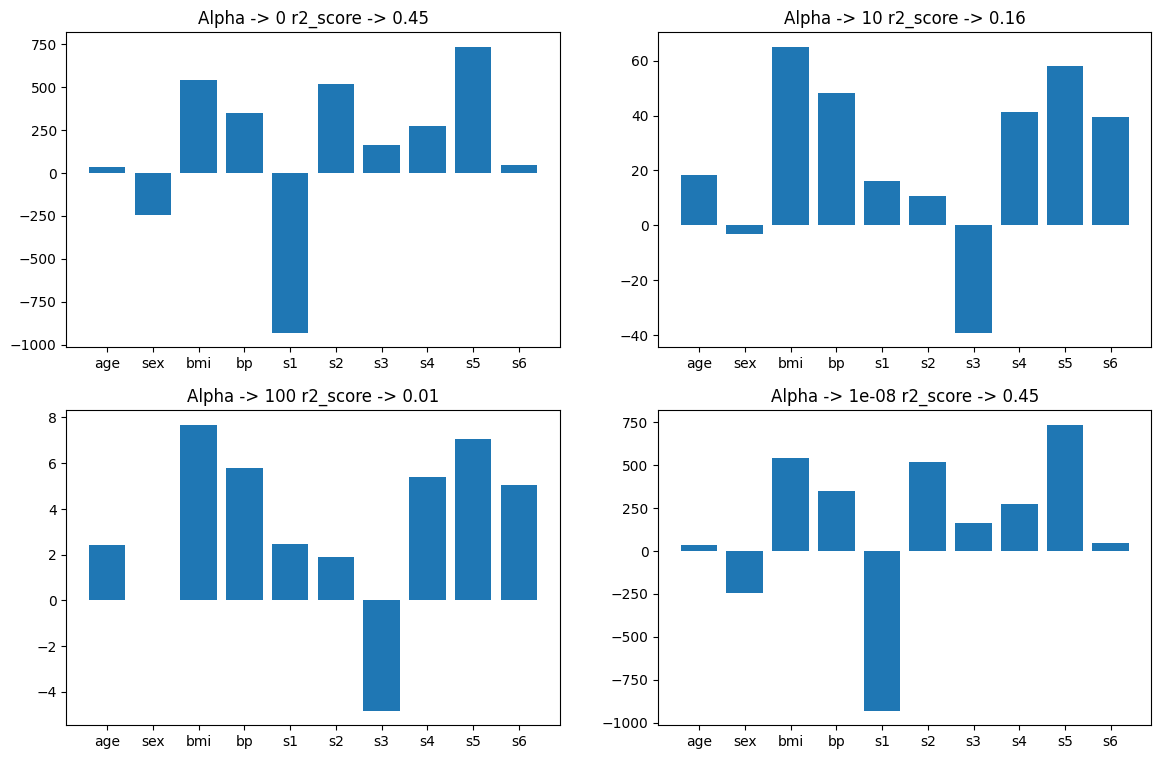

In [96]:
plt.figure(figsize=(14,9))

for i in range(0,4):
    plt.subplot(2,2,(i+1))
    plt.bar(data.feature_names , coefs[i])
    plt.title(f'Alpha -> {alp[i]}'  f' r2_score -> {round(r2_scores[i],2)}')